In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
from tensorflow.python.client import device_lib 
print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13333536 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6687592829356387862
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3649784965311715304
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6605748535981921454
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15695549568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11222024090912572363
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
import tensorflow as tf 

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import time
start=time.time()
%run /content/mnist_cnn.py
end=time.time()
print(end-start)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2977 - accuracy: 0.9094 - val_loss: 0.0740 - val_accuracy: 0.9787
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0993 - accuracy: 0.9704 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0489 - accuracy: 0.9842 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0407 - val_accuracy: 0.9878
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0

Run time on GPU=36.8 seconds, run time on my computer=512.55 seconds (8 minutes and 32 seconds)

Step2. Implement handwritten recognition in Tensorflow using CNN

In [2]:
import keras
from tensorflow.keras.datasets import  mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
batch_size = 128 
num_classes = 10 
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape,y_test.shape

((60000, 28, 28), (60000,), (10000,))

In [ ]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
  input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Q2 **
Designing the model: The following model is made of three part (layers)-
**First** the "convolution layers" which is the feature extraction by applying some *filters* to the input neurons to generate numbers out of the images, a language that the machine understand. Also,an activation function is applied to the convolution layers in order to remove elements which are jusfied as negative. 
**The second**  part of the code is the "pooling layers" (max or average) which is reducing the size or features of the network known as *downsampling* by retaining the most important ones, reducing calcution and the parameters of the model. 
**The third** part of the model is the "fully connected layers" which is the classifier by implementing the multi-layer perceptron with "*softmax*" function to classify the output.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
			  
cnn_model=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
		  
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2658 - accuracy: 0.9176 - val_loss: 0.0615 - val_accuracy: 0.9829
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0929 - accuracy: 0.9727 - val_loss: 0.0496 - val_accuracy: 0.9859
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0696 - accuracy: 0.9796 - val_loss: 0.0420 - val_accuracy: 0.9876
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0382 - val_accuracy: 0.9885
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0435 - val_accuracy: 0.9884
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0374 - val_accuracy: 0.9891
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 

The acccuracy of 99.21% is pretty good, i'd say it's the ideal accuracy a data scientist should be looking for. In the meantime it's questionable.
Let's look into the learning curve to figure out how accurate reliable this result is. 

  **Q3**: Plotting the learning curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


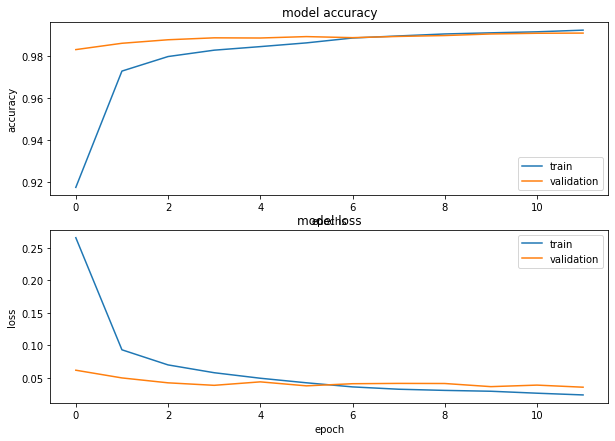

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()



The learning curve above shows some signs of overfitting.

**Model improvement**
let's improve our previous model by adding the "kernel_initializer" and increasing the dropout rate from the hidden layer to the output layer from .5 to .6

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='normal', activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3),kernel_initializer='normal', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,kernel_initializer='normal', activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
			  
cnn_model=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
		  
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3909 - accuracy: 0.8773 - val_loss: 0.0830 - val_accuracy: 0.9752
Epoch 2/12
375/375 [==============================] - 3s 8ms/step - loss: 0.1396 - accuracy: 0.9587 - val_loss: 0.0597 - val_accuracy: 0.9824
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.1022 - accuracy: 0.9688 - val_loss: 0.0532 - val_accuracy: 0.9846
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0867 - accuracy: 0.9739 - val_loss: 0.0460 - val_accuracy: 0.9878
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0726 - accuracy: 0.9780 - val_loss: 0.0454 - val_accuracy: 0.9863
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 7/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0430 - val_accuracy: 0.9880
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


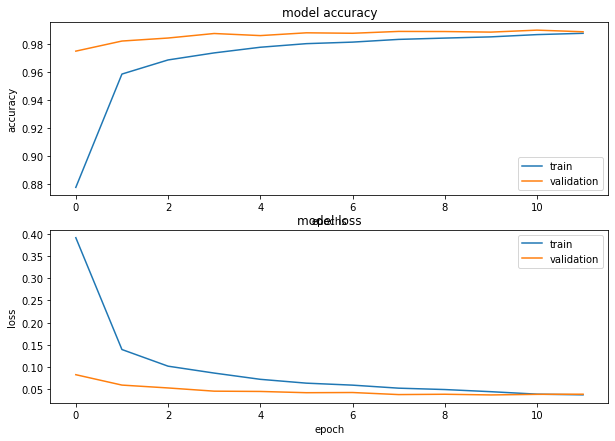

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

**Step** **3** Text mining using CNN

In [196]:
import pandas as pd
df=pd.read_csv('/content/amazon_cells_labelled.txt',names=['sentence','label'],sep='\t')

In [197]:
df.info

<bound method DataFrame.info of                                               sentence  label
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]>

In [4]:
df.sentence[0],df.label[0]

('So there is no way for me to plug it in here in the US unless I go by a converter.',
 0)

In [5]:
df.sentence[5]

'I have to jiggle the plug to get it to line up right to get decent volume.'

In [6]:
df.iloc[0]

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object

It look like we have equal number of labels.

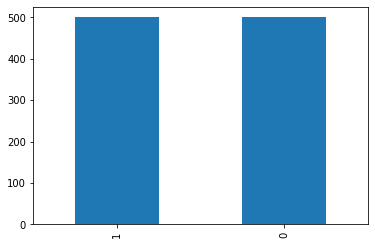

In [3]:
df.label.value_counts().plot(kind='bar')

In [199]:
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [200]:
df.shape

(1000, 2)

In [10]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=0,lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [14]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [41]:
from sklearn.model_selection import train_test_split 
sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Word cloud

In [17]:
Goodrate=df.sentence[df.label==1]
Badrate=df.sentence[df.label==0]
Goodrate

1                            Good case, Excellent value.
2                                 Great for the jawbone.
4                                      The mic is great.
7            If you are Razr owner...you must have this!
10                       And the sound quality is great.
                             ...                        
971                                   Excellent product.
975    It is the best charger I have seen on the mark...
976                                    SWEETEST PHONE!!!
977               :-)Oh, the charger seems to work fine.
978    It fits so securely that the ear hook does not...
Name: sentence, Length: 500, dtype: object

In [18]:
Goodrate.shape

(500,)

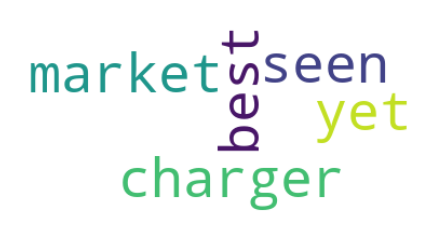

In [19]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cloudg = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(Goodrate[975])
plt.imshow(cloudg, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

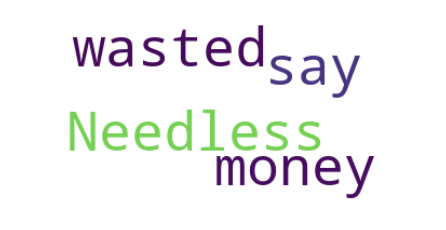

In [20]:

cloudb = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(Badrate[8])
plt.imshow(cloudb,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(sentences_train)
X_train=vectorizer.transform(sentences_train)
X_test=vectorizer.transform(sentences_test)
X_train,X_test

(<750x1546 sparse matrix of type '<class 'numpy.int64'>'
 	with 6817 stored elements in Compressed Sparse Row format>,
 <250x1546 sparse matrix of type '<class 'numpy.int64'>'
 	with 1983 stored elements in Compressed Sparse Row format>)

In [ ]:
 X_train[1]

let's  run a simple logistic regression on the dataset and look at the outcome

In [5]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
score=classifier.score(X_test,y_test)
print('Accuracy=', score*100,'%')

Accuracy= 79.60000000000001 %


# Implementing a DNN to our "Amazon" dataset.

In [6]:

X_train = vectorizer.transform(sentences_train).toarray() 
X_test = vectorizer.transform(sentences_test).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim=X_train.shape[1]
model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist=model.fit(X_train,y_train,validation_split=.2,batch_size=10,verbose=1,epochs=10)
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print('Test Accuracy:', accuracy*100)
print('Loss:', loss)

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5700 - val_loss: 0.6808 - val_accuracy: 0.6067
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.8217 - val_loss: 0.6443 - val_accuracy: 0.7400
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.9133 - val_loss: 0.5912 - val_accuracy: 0.8000
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.9433 - val_loss: 0.5407 - val_accuracy: 0.7867
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.9633 - val_loss: 0.5004 - val_accuracy: 0.7933
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.9783 - val_loss: 0.4715 - val_accuracy: 0.7933
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9817 - val_loss: 0.4494 - val_accuracy: 0.8133
Epoch 8/10
60/60 [==

Drawing the learning curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


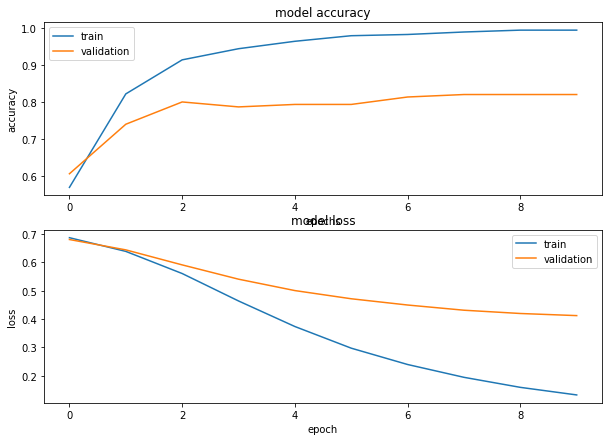

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

# Q4
The learning curve above shows that our model is overfitting. This problem can be solve through "regularization" (lasso or ridge),dropout or early stopping. Let's improve it with l2 regularizer.

In [5]:
from tensorflow.keras import regularizers
X_train = vectorizer.transform(sentences_train).toarray() 
X_test = vectorizer.transform(sentences_test).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim=X_train.shape[1]
model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim,kernel_regularizer=regularizers.l2(.2), activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist=model.fit(X_train,y_train,validation_split=.2,batch_size=10,verbose=1,epochs=10)
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print('Test Accuracy:', accuracy*100)
print('Loss:', loss)

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 1.8359 - accuracy: 0.5700 - val_loss: 0.7546 - val_accuracy: 0.6600
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.7217 - val_loss: 0.6903 - val_accuracy: 0.7867
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.7383 - val_loss: 0.6869 - val_accuracy: 0.7133
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.7533 - val_loss: 0.6843 - val_accuracy: 0.7267
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.7717 - val_loss: 0.6836 - val_accuracy: 0.7467
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.7583 - val_loss: 0.6805 - val_accuracy: 0.7667
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.7650 - val_loss: 0.6798 - val_accuracy: 0.7600
Epoch 8/10
60/60 [==

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


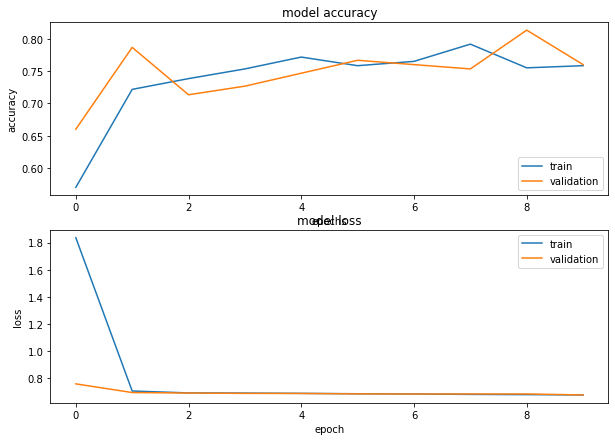

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

Voilla! we've improved our model with a ridge regularizer. The above learning curve looks great. 

# Further Model improvement
Create 3 hidden layers (first one 200 nodes, second one 100 nodes and last one 50 nodes and after each step, add dropout of 0.2 and report the accuracy

In [8]:
X_train = vectorizer.transform(sentences_train).toarray() 
X_test = vectorizer.transform(sentences_test).toarray()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
input_dim=X_train.shape[1]
model=Sequential()
model.add(Dense(200,input_dim=input_dim, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(100,activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(50,activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
hist=model.fit(X_train,y_train,validation_split=.2,batch_size=10,verbose=1,epochs=10)
loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print('Test Accuracy:', accuracy*100)

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6992 - accuracy: 0.5183 - val_loss: 0.6864 - val_accuracy: 0.4933
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6383 - val_loss: 0.6028 - val_accuracy: 0.7867
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8900 - val_loss: 0.4061 - val_accuracy: 0.8267
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9800 - val_loss: 0.3756 - val_accuracy: 0.8400
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9950 - val_loss: 0.3882 - val_accuracy: 0.8333
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.4073 - val_accuracy: 0.8400
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 0.8533
Epoch 8/10
60/60 [==

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


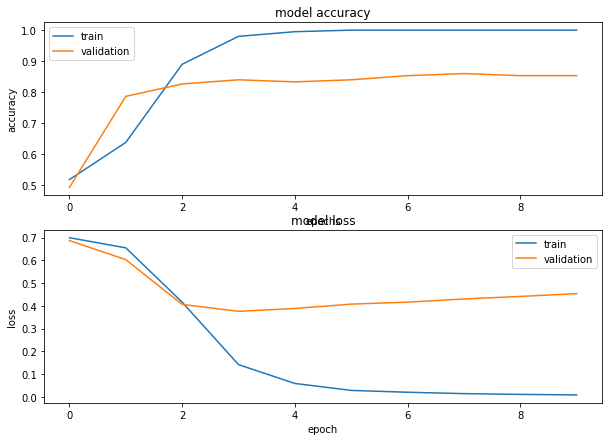

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

As we can see adding 3 more hidden layers has not improved our model at all. It has actually worsen the model, making it more complex and prone to overfitting.

# 3.2. Embedded word:

In [131]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1 
print(sentences_train[3]),print(X_train[3])


This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


(None, None)

In [9]:
vocab_size

1574

In [20]:
for word in ['the', 'all', 'happy']:
 print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [132]:
from keras.preprocessing.sequence import pad_sequences 
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) 
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


# 3.3. Model training

In [77]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
embedding_dim = 50
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,
output_dim=embedding_dim,
input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           78700     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


 **Model training  and evaluation** 

In [81]:
hist = model.fit(X_train, y_train, epochs=50,validation_split=0.2,batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy= ",accuracy*100, '%')

Epoch 1/50
60/60 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.4883 - val_loss: 0.6876 - val_accuracy: 0.5267
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.6217 - val_loss: 0.6701 - val_accuracy: 0.7400
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.9133 - val_loss: 0.6226 - val_accuracy: 0.7733
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.9550 - val_loss: 0.5465 - val_accuracy: 0.8000
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.9550 - val_loss: 0.4719 - val_accuracy: 0.8133
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2314 - accuracy: 0.9733 - val_loss: 0.4205 - val_accuracy: 0.8067
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1412 - accuracy: 0.9750 - val_loss: 0.3999 - val_accuracy: 0.7933
Epoch 8/50
60/60 [==

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


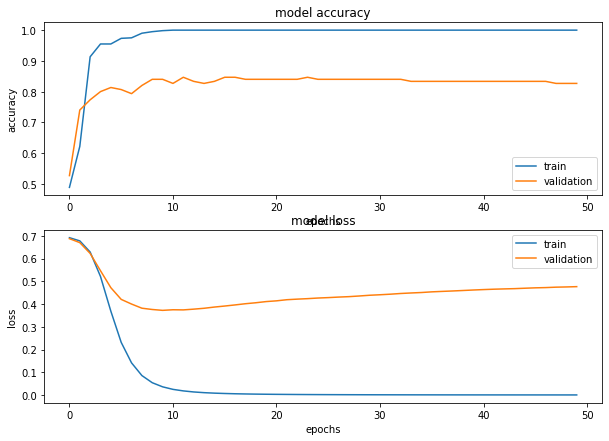

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Q5: Interpreting the learning curve
The model is overfitting since the validation curve is shifting  from the training one (a big gap between the 2 curves).

# Q6: Model improvement
In order to improve the model, we will add a dropout layer coupled with initializer and regularizer(l2) kernels.

In [193]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import layers
embedding_dim = 50
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,
output_dim=embedding_dim,
input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100,kernel_initializer='normal',kernel_regularizer=regularizers.l2(.8), activation='relu'))
model.add(layers.Dropout(.7))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 100, 50)           78700     
_________________________________________________________________
global_max_pooling1d_27 (Glo (None, 50)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 101       
Total params: 83,901
Trainable params: 83,901
Non-trainable params: 0
_________________________________________________________________


In [194]:
hist = model.fit(X_train, y_train, epochs=50,validation_split=0.2,batch_size=10)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False,)
print("Accuracy= ",accuracy*100, '%')

Epoch 1/50
60/60 [==============================] - 0s 6ms/step - loss: 4.9704 - accuracy: 0.4950 - val_loss: 1.9724 - val_accuracy: 0.5067
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 1.2616 - accuracy: 0.5250 - val_loss: 0.8737 - val_accuracy: 0.4933
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.7739 - accuracy: 0.4983 - val_loss: 0.7186 - val_accuracy: 0.4933
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5150 - val_loss: 0.6967 - val_accuracy: 0.4933
Epoch 5/50
60/60 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.4933 - val_loss: 0.6938 - val_accuracy: 0.6267
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4933
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5083 - val_loss: 0.6935 - val_accuracy: 0.5733
Epoch 8/50
60/60 [==

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower write'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


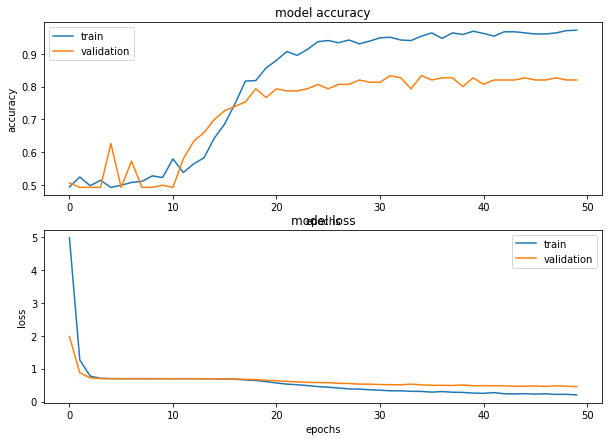

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='lower write')
plt.title('model accuracy')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

This learning curve is not very good but it's way better than the previous one. 